
# Análisis Exploratorio de Datos (EDA) con Seaborn

**Dataset:** Penguins (Palmer Archipelago)  
**Fuente:** seaborn.datasets (datos reales recolectados por el Palmer Station, Antártida)

## Objetivo
Explorar relaciones, distribuciones y correlaciones entre variables numéricas y categóricas
utilizando visualizaciones estadísticas con **Seaborn**.


In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Cargar dataset real
df = sns.load_dataset("penguins")

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



## Limpieza básica de datos

El dataset contiene valores faltantes en algunas mediciones físicas.
Para el análisis exploratorio:
- Eliminaremos filas con valores nulos en variables numéricas clave.


In [7]:

df_clean = df.dropna(subset=[
    "bill_length_mm", 
    "bill_depth_mm", 
    "flipper_length_mm", 
    "body_mass_g"
])

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB



## 1️⃣ Scatterplot: Relación entre longitud de aleta y masa corporal

Analizamos la relación entre dos variables numéricas:
- `flipper_length_mm`
- `body_mass_g`

Coloreamos por especie para identificar patrones por grupo.


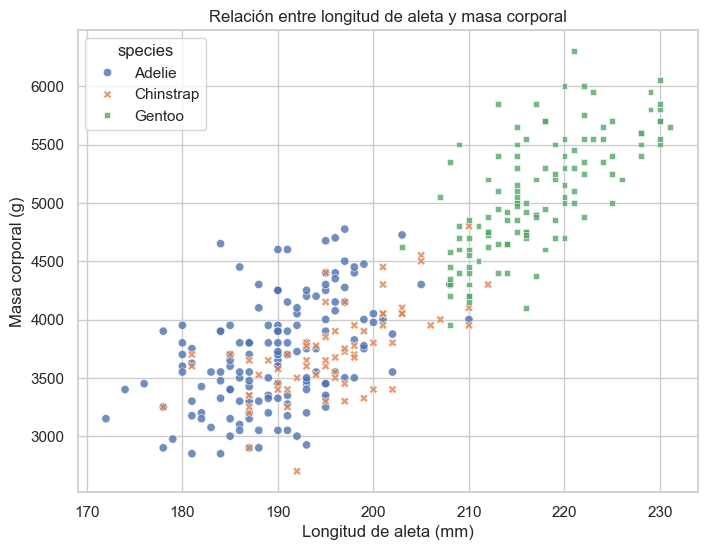

In [8]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    style="species",
    alpha=0.8
)

plt.title("Relación entre longitud de aleta y masa corporal")
plt.xlabel("Longitud de aleta (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()



### Observaciones

- Existe una **relación positiva clara**: a mayor longitud de aleta, mayor masa corporal.
- Las especies forman **clusters bien definidos**, lo que indica diferencias morfológicas.
- No se observan outliers extremos evidentes, aunque algunos individuos se separan ligeramente del grupo.



## 2️⃣ Boxplot: Distribución de masa corporal por especie

Comparamos la distribución de `body_mass_g` entre especies.
Esto permite detectar:
- Diferencias de mediana
- Dispersión
- Posibles outliers


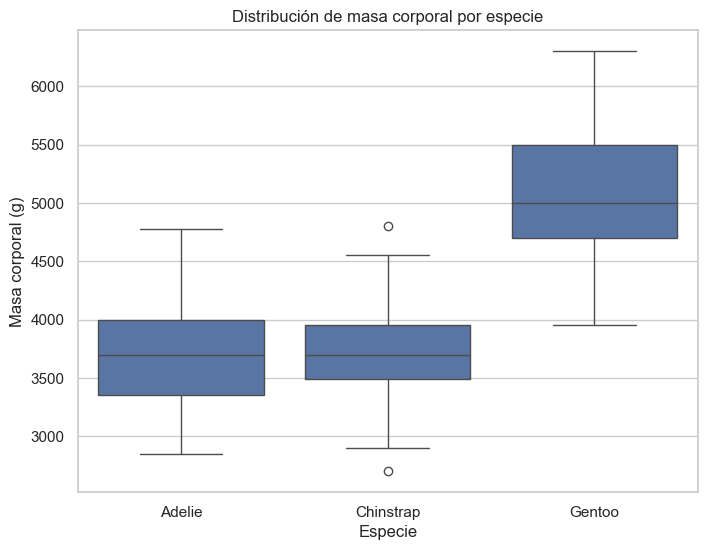

In [9]:

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_clean,
    x="species",
    y="body_mass_g"
)

plt.title("Distribución de masa corporal por especie")
plt.xlabel("Especie")
plt.ylabel("Masa corporal (g)")
plt.show()



### Observaciones

- **Gentoo** presenta la mayor masa corporal promedio.
- **Adelie** es la especie más ligera.
- Se observan algunos **outliers superiores**, especialmente en Gentoo, lo cual puede corresponder a individuos excepcionalmente grandes.



## 3️⃣ Heatmap de correlación entre variables numéricas

Calculamos la matriz de correlación para:
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g


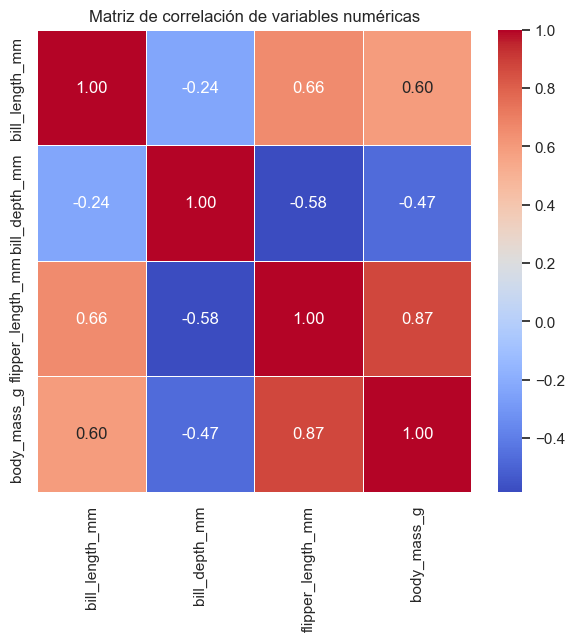

In [10]:

numeric_cols = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
]

corr = df_clean[numeric_cols].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de correlación de variables numéricas")
plt.show()



### Observaciones

- La **correlación más fuerte** se da entre `flipper_length_mm` y `body_mass_g`.
- `bill_depth_mm` presenta correlaciones más débiles, lo que sugiere que no es un buen predictor directo del tamaño corporal.
- No se observan correlaciones negativas fuertes.



## Conclusiones generales

- El dataset muestra **estructuras claras por especie**, lo que valida su uso para clasificación.
- Existen **relaciones lineales fuertes** entre variables morfológicas.
- Las visualizaciones permiten identificar patrones y posibles valores atípicos de forma intuitiva.

Este EDA es una base sólida para:
- Modelos predictivos
- Clasificación de especies
- Análisis multivariado
